# Notebook to introduce some of the basic analyses we've started doing

## Imports

In [1]:
import os 
import glob
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

from mosquito.process_abf import load_processed_data

## Load data

In [9]:
# give identifying info for data file (folder in the form XX_YYYYMMDD and the abf file number)
data_folder = '33_20240626'  
axo_num1 = 3  
axo_num2 = 4

# load data set using convenience function
data1 = load_processed_data(data_folder, axo_num1)
data2 = load_processed_data(data_folder, axo_num2)

In [10]:
# print out data dictionary keys
for key in data1.keys():
    print(key)
    

sampling_freq
filepath
units
header
time
emg
cam
mic
odor
species
muscle_type
filename
mic_filt
mic_phase
wbf_mean
wbf
flying_idx
emg_filt
spikes
spike_t
spike_idx
spike_rate
params


In [11]:
# read out spike rate and time
t1 = data1['time']
spike_rate1 = data1['spike_rate']

t2 = data2['time']
spike_rate2 = data2['spike_rate']

## Visualize

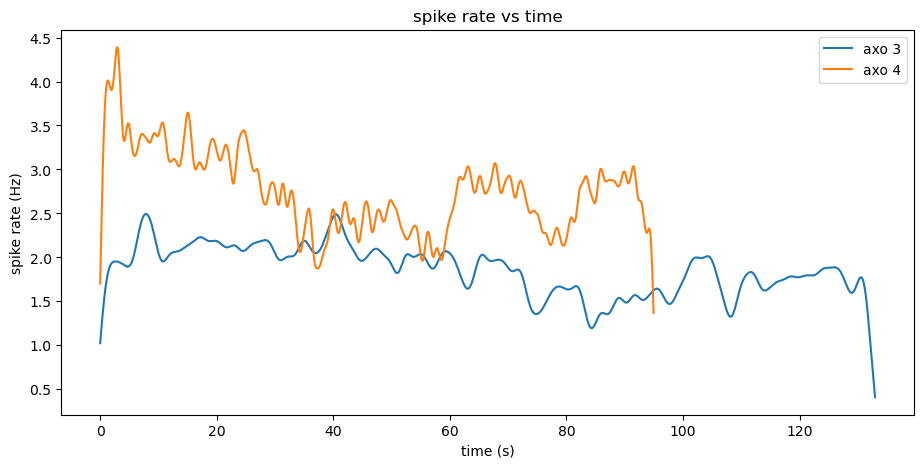

In [12]:
# make a plot of spike rate vs time
fig, ax = plt.subplots(figsize=(11, 5))

# plot data
ax.plot(t1, spike_rate1, label='axo 3')
ax.plot(t2, spike_rate2, label='axo 4')

# label axes
ax.set_xlabel('time (s)') 
ax.set_ylabel('spike rate (Hz)') 
ax.set_title('spike rate vs time')

# create legend 
plt.legend()

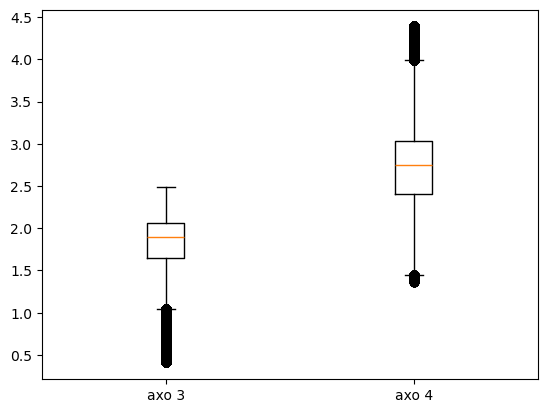

In [14]:
# compare binned values
plt.boxplot([spike_rate1, spike_rate2], labels=['axo 3', 'axo 4']) ;

## Look at other data types

In [19]:
# wingbeat frequency and emg (electrode signal)
wbf1 = data1['wbf']  # for axo 3
emg1 = data1['emg']

wbf2 = data2['wbf']  # for axo 4
emg2 = data2['emg']


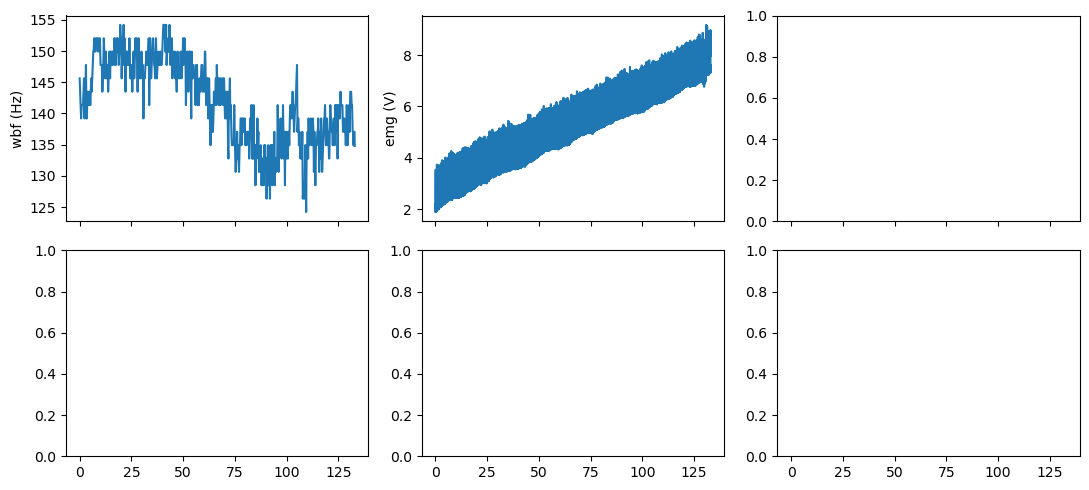

In [28]:
# visualize these two
fig, ax_list = plt.subplots(2, 3,figsize=(11,5), sharex=True)
ax_list = ax_list.ravel()

ax_list[0].plot(t1, wbf1)
ax_list[0].set_ylabel('wbf (Hz)')

ax_list[1].plot(t1, emg1)
ax_list[1].set_ylabel('emg (V)')

fig.tight_layout()

In [21]:
# what is the mean wingbeat frequency?
print(f'mean wingbeat frequency (in Hz) for axo 3: {np.mean(wbf1)}')
print(f'mean wingbeat frequency (in Hz) for axo 4: {np.mean(wbf2)}')

mean wingbeat frequency (in Hz) for axo 3: 141.87432541989781
mean wingbeat frequency (in Hz) for axo 4: 158.9019195489306


## What if we want to make more comparisons?

In [22]:
# make lists of expr folders and axo numbers:
data_id_list = [('28_20240529', 0),
                ('28_20240529', 1), 
                ('29_20240530', 7),
                ('29_20240530', 8)]


In [26]:
# loop through and get mean wingbeat
wbf_mean_list = list()  # initialize storage for wingbeat frequency data

# loop over data files
for data_id in data_id_list:
    # load current data file
    data_folder, axo_num = data_id
    data = load_processed_data(data_folder, axo_num)

    # get wingbeat frequencies
    wbf = data['wbf']

    # exclude non-flying times
    wbf = wbf[data['flying_idx']]

    # take mean and store
    wbf_mean = np.mean(wbf)
    wbf_mean_list.append(wbf_mean)

wbf_mean_list

[413.29606010536963, 420.6182875012305, 362.54224730228344, 363.98857160199765]

In [ ]:
# old values: [413.29606010536963, 420.6182875012305, 359.8982833845298, 363.98857160199765]

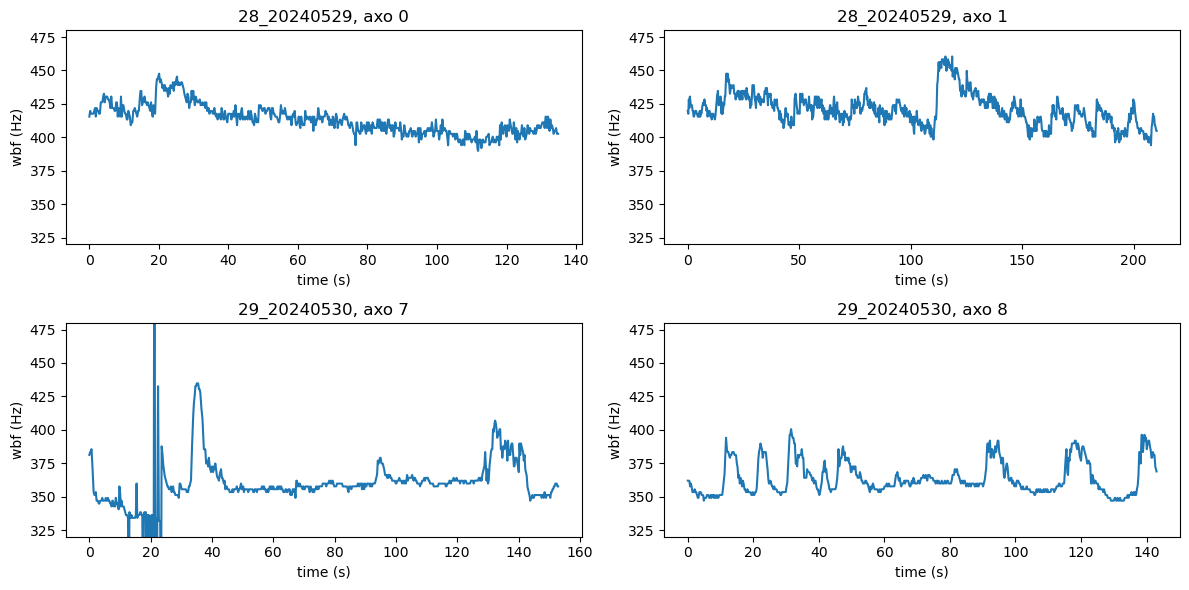

In [31]:
# make a 2x2 figure with wingbeat frequencies from different data files 
fig, ax_list = plt.subplots(2,2,figsize=(12, 6))
ax_list = ax_list.ravel()

for ith, data_id in enumerate(data_id_list):
     # load current data file
    data_folder, axo_num = data_id
    data = load_processed_data(data_folder, axo_num)

    # plot wbf to axies
    ax_list[ith].plot(data['time'], data['wbf'])

    # label axes so we know the data file
    ax_list[ith].set_title(f'{data_folder}, axo {axo_num}')
    ax_list[ith].set_xlabel('time (s)')
    ax_list[ith].set_ylabel('wbf (Hz)')

    # set axis limits
    ax_list[ith].set_ylim([320, 480])

fig.tight_layout()
